In [19]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, PReLU, Flatten, Softmax
from tensorflow.keras.models import Model
import tensorflow.compat.v1 as tf
import numpy as np

In [21]:
X = Input(shape = (None, None, 3), name='PNet_Input')
L = Conv2D(10, kernel_size=(3, 3), strides=(1, 1), padding='valid', name='PNet_CONV1')(X)
L = PReLU(shared_axes=[1, 2], name='PNet_PRELU1')(L)
L = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same', name='PNet_MAXPOOL1')(L)

L = Conv2D(16, kernel_size=(3, 3), strides=(1, 1), padding='valid', name='PNet_CONV2')(L)
L = PReLU(shared_axes=[1, 2], name='PNet_PRELU2')(L)

L = Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding='valid', name='PNet_CONV3')(L)
L = PReLU(shared_axes=[1, 2], name='PNet_PRELU3')(L)

classifier = Conv2D(1, kernel_size=(1, 1), strides=(1, 1), activation='sigmoid', name = 'FACE_CLASSIFIER')(L)
regressor = Conv2D(4, kernel_size=(1, 1), strides=(1, 1), name = 'BB_REGRESSION')(L)

p_net = Model(X, [classifier, regressor])

In [22]:
p_net.summary()

Model: "functional_13"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
PNet_Input (InputLayer)         [(None, None, None,  0                                            
__________________________________________________________________________________________________
PNet_CONV1 (Conv2D)             (None, None, None, 1 280         PNet_Input[0][0]                 
__________________________________________________________________________________________________
PNet_PRELU1 (PReLU)             (None, None, None, 1 10          PNet_CONV1[0][0]                 
__________________________________________________________________________________________________
PNet_MAXPOOL1 (MaxPooling2D)    (None, None, None, 1 0           PNet_PRELU1[0][0]                
______________________________________________________________________________________

In [23]:
p_net.get_layer('PNet_Input')

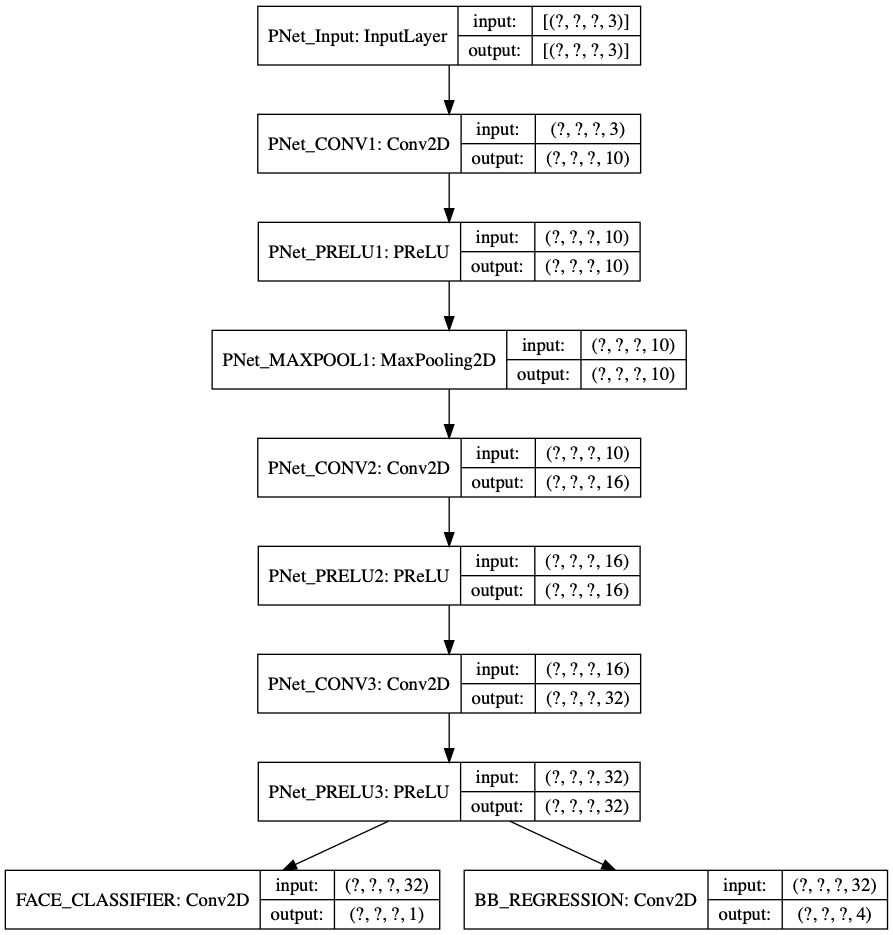

In [24]:
tf.keras.utils.plot_model(p_net, "p_net.png", show_shapes = True)

In [ ]:
# define the loss


In [ ]:
p_net.compile(
    loss='sparse_categorical_crossentropy', 
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=['accuracy']
)



In [ ]:
p_net.fit(train_set, y_train, batchSize, epochs)

In [ ]:
loss = tf.reduce_mean(tf.square(bprob-train_net.get_layer('conv4-1')))+bprobmask*0.5*tf.reduce_mean(tf.square(bcoord-train_net.get_layer('conv4-2')))
optimizer = tf.train.AdamOptimizer()

In [ ]:
model.fit()